In [1]:
# The easiest way to get rvest is to install the whole tidyverse:
install.packages("tidyverse")

# Alternatively, install just rvest:
install.packages("rvest")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(tidyverse)
library(rvest)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




In [45]:
#first we download the dataset from the web
temp <- tempfile()
download.file("https://archive.ics.uci.edu/static/public/45/heart+disease.zip",temp)
heart_disease_data <- read.table(unz(temp, "reprocessed.hungarian.data"))
unlink(temp)
heart_disease_data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
40,1,2,140,289,0,0,172,0,0.0,-9,-9,-9,0
49,0,3,160,180,0,0,156,0,1.0,2,-9,-9,1
37,1,2,130,283,0,1,98,0,0.0,-9,-9,-9,0
48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3
54,1,3,150,-9,0,0,122,0,0.0,-9,-9,-9,0
39,1,3,120,339,0,0,170,0,0.0,-9,-9,-9,0
45,0,2,130,237,0,0,170,0,0.0,-9,-9,-9,0
54,1,2,110,208,0,0,142,0,0.0,-9,-9,-9,0
37,1,4,140,207,0,0,130,1,1.5,2,-9,-9,1


In [46]:
#rename the columns so they are more comprehensive
heart_disease_data <- rename(heart_disease_data,
                             age = V1,
                             sex = V2,
                             chest_pain = V3,
                             rbp = V4,
                             cholesterol = V5,
                             fbs = V6,
                             restecg = V7,
                             max_hr = V8,
                             exang = V9,
                             oldpeak = V10,
                             slope = V11,
                             num_major_vessels = V12,
                             thal = V13,
                             diagnosis = V14)  
heart_disease_data

age,sex,chest_pain,rbp,cholesterol,fbs,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,diagnosis
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
40,1,2,140,289,0,0,172,0,0.0,-9,-9,-9,0
49,0,3,160,180,0,0,156,0,1.0,2,-9,-9,1
37,1,2,130,283,0,1,98,0,0.0,-9,-9,-9,0
48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3
54,1,3,150,-9,0,0,122,0,0.0,-9,-9,-9,0
39,1,3,120,339,0,0,170,0,0.0,-9,-9,-9,0
45,0,2,130,237,0,0,170,0,0.0,-9,-9,-9,0
54,1,2,110,208,0,0,142,0,0.0,-9,-9,-9,0
37,1,4,140,207,0,0,130,1,1.5,2,-9,-9,1


In [47]:
#select the columns we will be using to predict the diagnosis
heart_disease_new <- select(heart_disease_data, age, sex, cholesterol, rbp, diagnosis)
heart_disease_new

age,sex,cholesterol,rbp,diagnosis
<int>,<int>,<int>,<int>,<int>
40,1,289,140,0
49,0,180,160,1
37,1,283,130,0
48,0,214,138,3
54,1,-9,150,0
39,1,339,120,0
45,0,237,130,0
54,1,208,110,0
37,1,207,140,1


In [48]:
#rename 0 and 1 in sex column as female and male
heart_disease_new2 <- heart_disease_new|>
mutate(sex = as_factor(sex))|>
mutate(sex = fct_recode(sex, "female" = "0", "male" = "1"))
heart_disease_new2

age,sex,cholesterol,rbp,diagnosis
<int>,<fct>,<int>,<int>,<int>
40,male,289,140,0
49,female,180,160,1
37,male,283,130,0
48,female,214,138,3
54,male,-9,150,0
39,male,339,120,0
45,female,237,130,0
54,male,208,110,0
37,male,207,140,1


In [49]:
#do the same thing for diagnosis
heart_disease_final <- heart_disease_new2|>
mutate(diagnosis = as_factor(diagnosis))|>
mutate(diagnosis = fct_recode(diagnosis, "absent" = "0", "level_1" = "1", "level_2" = "2", "level_3" = "3", "level_4" = "4"))
heart_disease_final

age,sex,cholesterol,rbp,diagnosis
<int>,<fct>,<int>,<int>,<fct>
40,male,289,140,absent
49,female,180,160,level_1
37,male,283,130,absent
48,female,214,138,level_3
54,male,-9,150,absent
39,male,339,120,absent
45,female,237,130,absent
54,male,208,110,absent
37,male,207,140,level_1


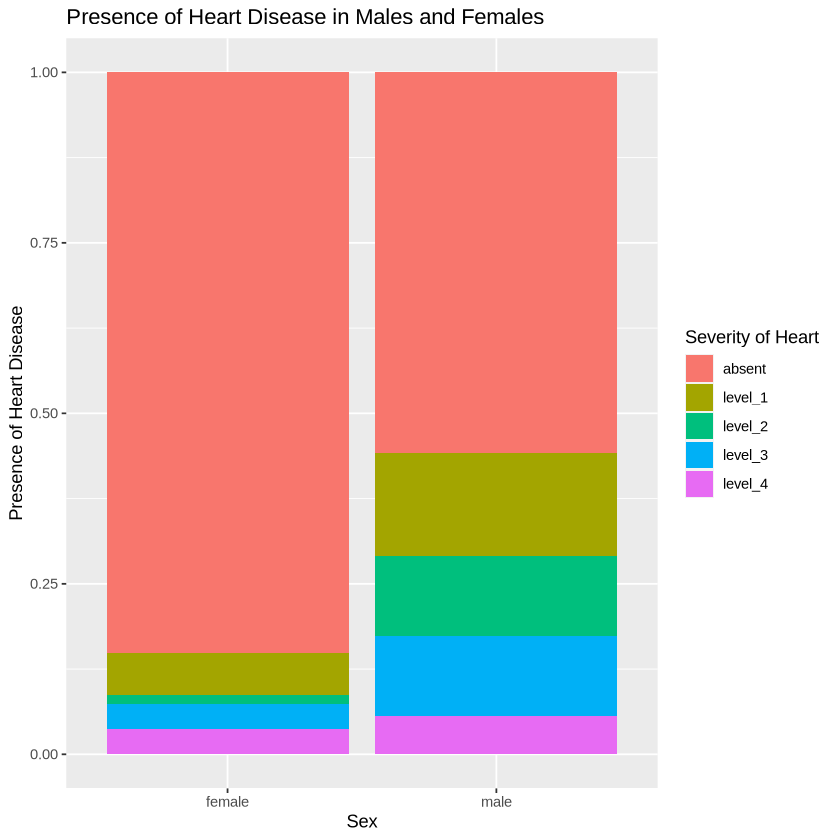

In [50]:
#create a visualization of the some of the data 
heart_disease_1<- select(heart_disease_final, sex, diagnosis)

heart_disease_1_plot <- heart_disease_1 |>
   ggplot(aes(x = sex, fill = diagnosis)) + 
   geom_bar(position = 'fill') + 
   xlab("Sex") +
   ylab("Presence of Heart Disease") +
   labs(fill = "Severity of Heart") +
   ggtitle("Presence of Heart Disease in Males and Females")

heart_disease_1_plot